In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\DELL\Desktop\FN_Final\Model\final_dataset.csv")


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185803 entries, 0 to 185802
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   185803 non-null  int64 
 1   text    185803 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


In [3]:
df.columns.tolist()

['label', 'text']

In [4]:
df.head()
#  1 = True / 0 = False

label                                               text
0      0  did miley cyrus and liam hemsworth secretly ge...
1      0  paris jackson & cara delevingne enjoy night ou...
2      0  celebrities join tax march in protest of donal...
3      0  cindy crawfords daughter kaia gerber wears a w...
4      0      full list of 2018 oscar nominations ‚Äì variety

In [5]:
pip install -r C:\Users\DELL\Desktop\FN_Final\Model\requirements.txt

  Using cached transformers-4.52.4-py3-none-any.whl.metadata (38 kB)
  Using cached datasets-3.6.0-py3-none-any.whl.metadata (19 kB)
  Using cached peft-0.15.2-py3-none-any.whl.metadata (13 kB)
  Using cached accelerate-1.7.0-py3-none-any.whl.metadata (19 kB)
  Using cached bitsandbytes-0.46.0-py3-none-manylinux_2_24_x86_64.whl.metadata (10 kB)
  Using cached evaluate-0.4.3-py3-none-any.whl.metadata (9.2 kB)
  Using cached huggingface_hub-0.33.0-py3-none-any.whl.metadata (14 kB)
  Using cached regex-2024.11.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.5/10.5 MB 25.2 MB/s eta 0:00:0000:010:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.1/3.1 MB 77.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"/teamspace/studios/this_studio/final_dataset.csv")

# Supprimer les lignes o√π la colonne "label" est NaN ou inf
df = df[~df["label"].isna()]  # enl√®ve les NaN
df = df[~df["label"].isin([np.inf, -np.inf])]  # enl√®ve les infinis

# convertir en entier
df["label"] = df["label"].astype(int)


In [7]:
from sklearn.model_selection import train_test_split

import torch

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# Split train / test
train_df, val_df = train_test_split(
    df, 
    test_size=0.2, 
    random_state=42, 
    stratify=df['label']
)

In [8]:
train_texts = train_df['text'].tolist()
train_labels = train_df['label'].tolist()

val_texts = val_df['text'].tolist()
val_labels = val_df['label'].tolist()

In [9]:
from transformers import BertTokenizer

#initialiser le tokenizer de BERT
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [10]:
#Tokenization
train_encodings = tokenizer(
    train_texts,
    truncation=True,
    padding=True,
    max_length=512,
    return_tensors='pt'
)

val_encodings = tokenizer(
    val_texts,
    truncation=True,
    padding=True,
    max_length=512,
    return_tensors='pt'
)

In [11]:
import torch
class FakeNewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        return {
            key: torch.tensor(val[idx])
            for key, val in self.encodings.items()
        } | {"labels": torch.tensor(self.labels[idx])}

    def __len__(self):
        return len(self.labels)

In [12]:
train_dataset = FakeNewsDataset(train_encodings, train_labels)
val_dataset = FakeNewsDataset(val_encodings, val_labels)

# Fine-Tuning de BERT


In [13]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from peft import prepare_model_for_kbit_training, LoraConfig, get_peft_model
from datasets import Dataset

#### Chargement du mod√©le BERT avec QLoRA (4-bit)

In [14]:
from transformers import BitsAndBytesConfig

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)

base_model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
    quantization_config=bnb_config,
    device_map="auto"
)

model = prepare_model_for_kbit_training(base_model)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
peft_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["query", "key", "value", "dense"],
    lora_dropout=0.05,
    bias="none",
    task_type="SEQ_CLS"
)

model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 2,680,322 || all params: 112,164,100 || trainable%: 2.3896


In [16]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = torch.argmax(torch.tensor(logits), axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels,
                                                               preds, 
                                                               average='binary',
                                                               zero_division=0)
    acc = accuracy_score(labels, preds)
    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall
    }

In [18]:
# add this check before creating the Trainer
if val_dataset is None:
    print("ERROR: val_dataset is None")
elif len(val_dataset) == 0:
    print("ERROR: val_dataset is empty")
else:
    print(f"val_dataset has {len(val_dataset)} samples")

# pour stocker les scores dans un fichier
from transformers import TrainerCallback
import json

class SaveMetricsCallback(TrainerCallback):
    def __init__(self, path="metrics_log.json"):
        self.path = path
        self.metrics = []

    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        if metrics is not None:
            self.metrics.append({"epoch": state.epoch, "step": state.global_step, **metrics})
            with open(self.path, "w") as f:
                json.dump(self.metrics, f, indent=2)


val_dataset has 37161 samples


In [11]:
training_args = TrainingArguments(
    output_dir="./results-qlora",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    save_total_limit=1,
    report_to="none",
    learning_rate=2e-4,
    weight_decay=0.01
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[SaveMetricsCallback()]
)


NameError: name 'Trainer' is not defined

In [20]:
trainer.train()

/tmp/ipykernel_3480/4271902066.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  key: torch.tensor(val[idx])
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/peft/utils/other.py:1110: UserWarning: Unable to fetch remote file due to the following error 503 Server Error: Service Temporarily Unavailable for url: https://huggingface.co/bert-base-uncased/resolve/main/config.json - silently ignoring the lookup for the file config.json in bert-base-uncased.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/peft/utils/save_and_load.py:236: UserWarning: Could not find a config file in bert-base-uncased - will assume that the vocabulary was not modified.
  warnings.warn(
/tmp/ipykernel_3480/4271902066.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  key: torch.tensor(val[idx])
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils

TrainOutput(global_step=37164, training_loss=0.08359978486667625, metrics={'train_runtime': 71512.3097, 'train_samples_per_second': 8.314, 'train_steps_per_second': 0.52, 'total_flos': 1.61333056661717e+17, 'train_loss': 0.08359978486667625, 'epoch': 4.0})

In [21]:
model.save_pretrained("my_model/")
tokenizer.save_pretrained("my_model/")

('my_model/tokenizer_config.json',
 'my_model/special_tokens_map.json',
 'my_model/vocab.txt',
 'my_model/added_tokens.json')

"Nous avons √©valu√© les performances du mod√®le √† chaque √©poque. Le score F1 converge d√®s la 4e √©poque, ce qui justifie le choix d‚Äôun nombre d‚Äô√©poques r√©duit pour √©viter l‚Äôoverfitting."

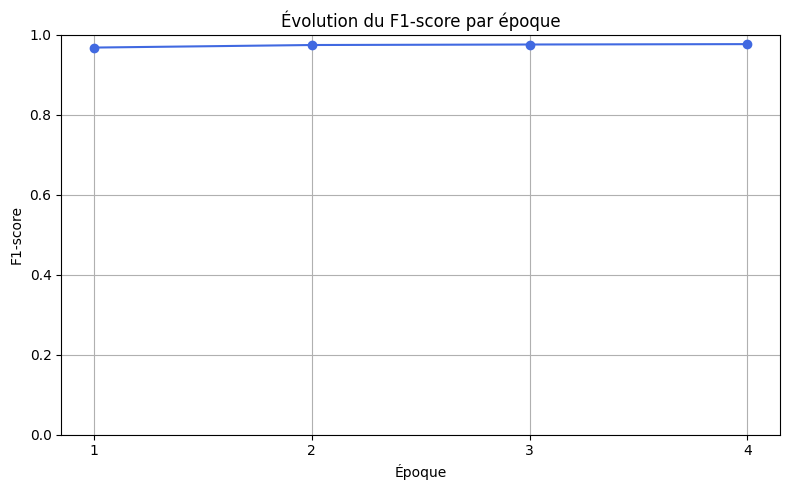

In [22]:
import json
import matplotlib.pyplot as plt

# Charger les m√©triques
with open("/teamspace/studios/this_studio/metrics_log.json", "r") as f:
    metrics = json.load(f)

# Extraire les donn√©es
epochs = [m["epoch"] for m in metrics]
f1_scores = [m["eval_f1"] for m in metrics]

# Tracer la courbe
plt.figure(figsize=(8, 5))
plt.plot(epochs, f1_scores, marker="o", color="royalblue")
plt.title("√âvolution du F1-score par √©poque")
plt.xlabel("√âpoque")
plt.ylabel("F1-score")
plt.grid(True)
plt.xticks(epochs)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("courbe_f1.png")
plt.show()


# New 

### Analyse d‚Äôerreurs

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import torch.nn.functional as F
import pandas as pd

# Pr√©dictions brutes
pred_outputs = trainer.predict(val_dataset)
pred_logits = pred_outputs.predictions
pred_probs = F.softmax(torch.tensor(pred_logits), dim=1)
pred_labels = torch.argmax(pred_probs, dim=1).numpy()

# Rapport de classification
print(classification_report(val_labels, pred_labels))

# Cr√©er DataFrame des erreurs
errors_df = pd.DataFrame({
    "Text": val_texts,
    "True Label": val_labels,
    "Predicted Label": pred_labels,
    "Confidence Fake (%)": (pred_probs[:, 1].numpy() * 100).round(2)
})

# Filtrer les erreurs
errors_only = errors_df[errors_df["True Label"] != errors_df["Predicted Label"]]

# Afficher les erreurs (les 10 premi√®res)
pd.set_option("display.max_colwidth", None)
display(errors_only.head(10))


/tmp/ipykernel_3480/4271902066.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  key: torch.tensor(val[idx])


              precision    recall  f1-score   support

           0       0.98      0.97      0.97     16616
           1       0.97      0.98      0.98     20545

    accuracy                           0.97     37161
   macro avg       0.97      0.97      0.97     37161
weighted avg       0.97      0.97      0.97     37161



Text  \
36                                                                                                                                                                                                                  kourtney & kim kim allergic to cats   
39                                                                                                                                                              taylor swift just gave a sneaky response to the internets joe alwyn breakup speculation   
90                                                                                                                                                                   taylor swift spent her fourth of july in turks and caicos with boyfriend joe alwyn   
133                                                                                                                                                                                         inside khloe kardashian and tristan thompsons babys nursery   
136  marilyn mosby held a press conference today in which she said police officers had no probable cause to arrest freddie gray that s a lie freddie gray had an active warrant out for his arrest so baltimore police had every reason to bring him in   
164                                                                                                                                                                                                                                        harry hamlin   
270                                                                                                                                                                                                            george hw bush has died at 94 ‚Äì new york   
292                                                                                                                                                                                        inside maksim chmerkovskiy & peta murgatroyds marital issues   
327                                                                                                                                                                                            britney spears kevin federline settle child support case   
395                                                                                                                                                        scott disick & younes bendjima‚Äôs ‚Äòawkward‚Äô run-in at xmas party there was ‚Äòdefinite tension‚Äô   

     True Label  Predicted Label  Confidence Fake (%)  
36            0                1            96.470001  
39            0                1            80.519997  
90            0                1            98.720001  
133           0                1            90.900002  
136           0                1            99.589996  
164           1                0            40.450001  
270           0                1            99.870003  
292           0                1            82.959999  
327           1                0             2.260000  
395           0                1            71.809998

####  G√©n√©rer et ins√©rer dans ton m√©moire :

###### √Ä ajouter dans le m√©moire :

###### La courbe de perte g√©n√©r√©e √† partir des logs de l'entra√Ænement permet de visualiser la convergence du mod√®le au fil des √©tapes d‚Äôapprentissage.

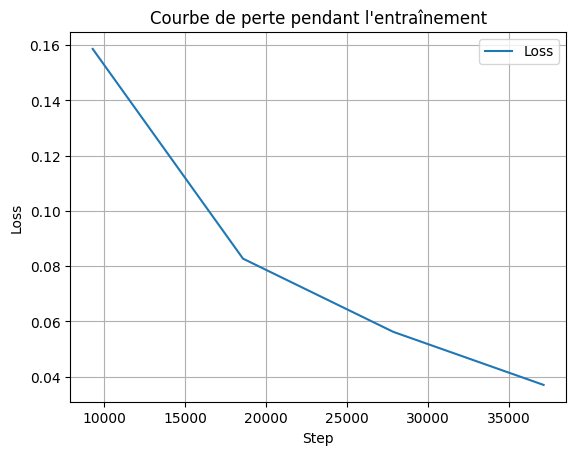

In [6]:
import json
import matplotlib.pyplot as plt

with open(r"C:\Users\DELL\Desktop\FN_Final\Model\backend\results-qlora\checkpoint-37164\trainer_state.json") as f:
    state = json.load(f)

losses = [l["loss"] for l in state["log_history"] if "loss" in l]
steps = [l["step"] for l in state["log_history"] if "loss" in l]

plt.plot(steps, losses, label="Loss")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Courbe de perte pendant l'entra√Ænement")
plt.legend()
plt.grid()
plt.show()


‚úÖ 3. Faire une analyse d'erreurs qualitative
Reprends quelques exemples mal class√©s √† partir des pr√©dictions du mod√®le sauvegard√© (faux positifs/faux n√©gatifs). Tu peux les afficher dans ton m√©moire sous forme de tableau :

Exemple (tronqu√©)	Label r√©el	Pr√©diction	Type d‚Äôerreur


‚ÄúLe vaccin cause‚Ä¶‚Äù	FAKE    	REAL	    Faux n√©gatif

üìå Dans ton m√©moire :

Une analyse qualitative a √©t√© men√©e sur les erreurs de pr√©diction. Elle r√©v√®le que certains contenus √† tonalit√© ironique ou ambigus sont mal class√©s, ce qui met en √©vidence les limites de la compr√©hension contextuelle du mod√®le.

#####################################################